# Projeto Final de Programação - Implementação KNN
**Pós-Graduação em Data Science and Business Intelligence - ISAG**

1. Introdução
No âmbito da unidade curricular de Programação, foi proposta a implementação manual de um algoritmo

2. KNN (K-Nearest Neighbors)
Escolhi implementar o KNN porque é um algoritmo mais intuitivo


In [ ]:
import numpy as np

# Algoritmo KNN
class KNN:
    def __init__(self, k=3): # Escolha do número de vizinhos (k) - Escolhi 3 por defeito e número ímpar para não dar empates
        self.k = k

    def fit(self, X, y): # Armazena os dados de treino para não os perder
        self.X_treino = X
        self.y_treino = y

    def predict(self, X_novos, normalizar=False): # Guarda as previsões aqui, e podemos pedir normalização
        previsoes = []
              
        X_treino_c = self.X_treino.copy()
        X_novos_c = X_novos.copy()
        
        if normalizar: # Normalização (Só acontece se pedirmos) -> Utilizei min-max normalization
            min_val = np.min(X_treino_c, axis=0)
            max_val = np.max(X_treino_c, axis=0)
                        
            X_treino_c = (X_treino_c - min_val) / (max_val - min_val)
            X_novos_c = (X_novos_c - min_val) / (max_val - min_val)

        
        for x_novo in X_novos_c:
            
            
            lista_distancias = [] # Lista para guardar a distância deste ponto novo a todos os outros
            
            
            for i in range(len(X_treino_c)): # Percorremos cada ponto do conjunto de treino e calculamos a distância até ao novo ponto
                ponto_antigo = X_treino_c[i]
                classe_antiga = self.y_treino[i]
         
               
                dist = np.sqrt(np.sum((ponto_antigo - x_novo)**2)) # Cálculo da Distância - Distância Euclidiana

                lista_distancias.append((dist, classe_antiga)) # Guardamos o resultado: Qual a distância e a classe deste ponto antigo
    
           
            lista_distancias.sort() # Após pesquisar, vi que o sort() ordena os valores automaticamente da lista
            
            vizinhos_proximos = lista_distancias[:self.k] # Permite que a nova lista fique limitada apenas aos k primeiros elementos
            
            # A partir daqui, fazemos a votação dos k vizinhos mais próximos, começando os dois contadores a zero
            votos_zero = 0
            votos_um = 0
            
            for vizinho in vizinhos_proximos:
                classe = vizinho[1] # Queremos ver o segundo elemento da tupla (distância, classe), portanto a classe
                if classe == 0:
                    votos_zero += 1
                else:
                    votos_um += 1
            
            # Decisão final:
            if votos_zero > votos_um:
                previsoes.append(0)
            else:
                previsoes.append(1)
            
        return np.array(previsoes)

## Exemplo Prático: Classificação de Imóveis

Para testar o algoritmo, criei um cenário simples de classificação de casas em duas categorias (Económica ou Luxo) baseada em Área do imóvel e Nº de quartos.

Escolhi deste cenário por ter variáveis muito diferentes e ser necessário normalização.

1. Área (m²): Varia entre 50 a 300 por exemplo.
2. Nº de Quartos: Varia entre 1 a 5 por exemplo.


--> Classificação: Casa de Luxo


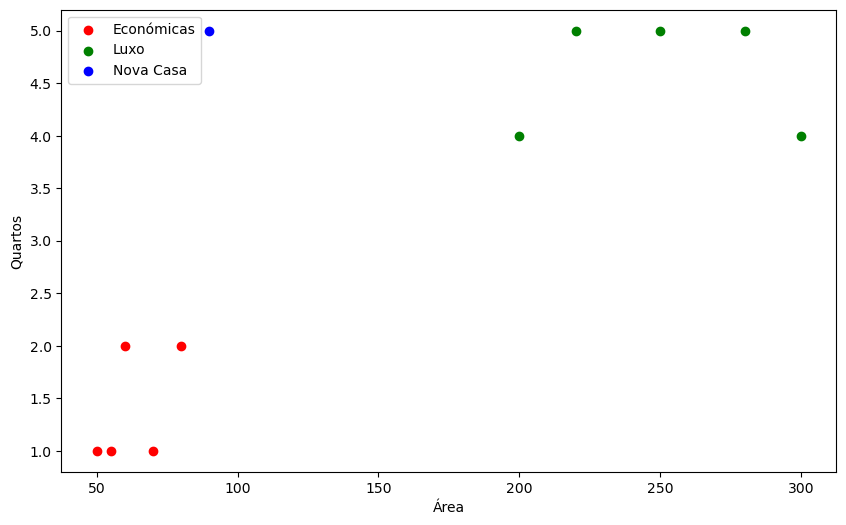

In [ ]:
import matplotlib.pyplot as plt

# Dados de treino: [Área, Quartos] e Classe (0=Económica, 1=Luxo)
X_casas = np.array([
    [50, 1], [60, 2], [70, 1], [80, 2], [55, 1],
    [200, 4], [250, 5], [300, 4], [220, 5], [280, 5]
])

y_casas = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Dado para prever
nova_casa = np.array([[90, 5]])

# Escolha de 3 vizinhos (k) para o KNN
modelo = KNN(k=3)
modelo.fit(X_casas, y_casas)


previsao = modelo.predict(nova_casa, normalizar=True) # Ativar a Normalização

if previsao[0] == 1:
    print("--> Classificação: Casa de Luxo")
else:
    print("--> Classificação: Casa Económica")


plt.figure(figsize=(10, 6))
plt.scatter(X_casas[y_casas==0][:,0], X_casas[y_casas==0][:,1], color='red', label='Económicas')
plt.scatter(X_casas[y_casas==1][:,0], X_casas[y_casas==1][:,1], color='green', label='Luxo')
plt.scatter(nova_casa[:,0], nova_casa[:,1], color='blue', label='Nova Casa')
plt.xlabel("Área")
plt.ylabel("Quartos")
plt.legend()
plt.show()
